## Investigation into Combined Cycle Power Plant Performance Data

Package imports

In [ ]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Data Acquisition:

The dataset under scrutiny captures information from a Combined Cycle Power Plant spanning six years (2006-2011) during full load operation. It includes hourly averages of ambient variables such as Temperature (T), Ambient Pressure (AP), Relative Humidity (RH), and Exhaust Vacuum (V). The primary goal is to predict the net hourly electrical energy output (EP) of the power plant.

### (a) Data Retrieval:

To commence our investigation, I obtained the dataset from the following source: Combined Cycle Power Plant Dataset

In [1]:
column_names = ["Temperature (T)", "Exhaust Vacuum (V)","Ambient Pressure (AP)", "Relative Humidity (RH)", "Net Hourly Electrical Energy Output (EP)"]
df = pd.read_excel('/Users/leyunlin/Downloads/CCPP/Folds5x2_pp.xlsx',names=column_names)
df

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Net Hourly Electrical Energy Output (EP)
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


Get the Cycle Power Plant Data Set

### (b) Exploring the data

#### i. Dataset Overview:

There are 9568 rows and 5 columns in this data set. Rows represent the number of the observations and the column represent the 5 variables: hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

#### ii. pairwise scatterplots of all the variables

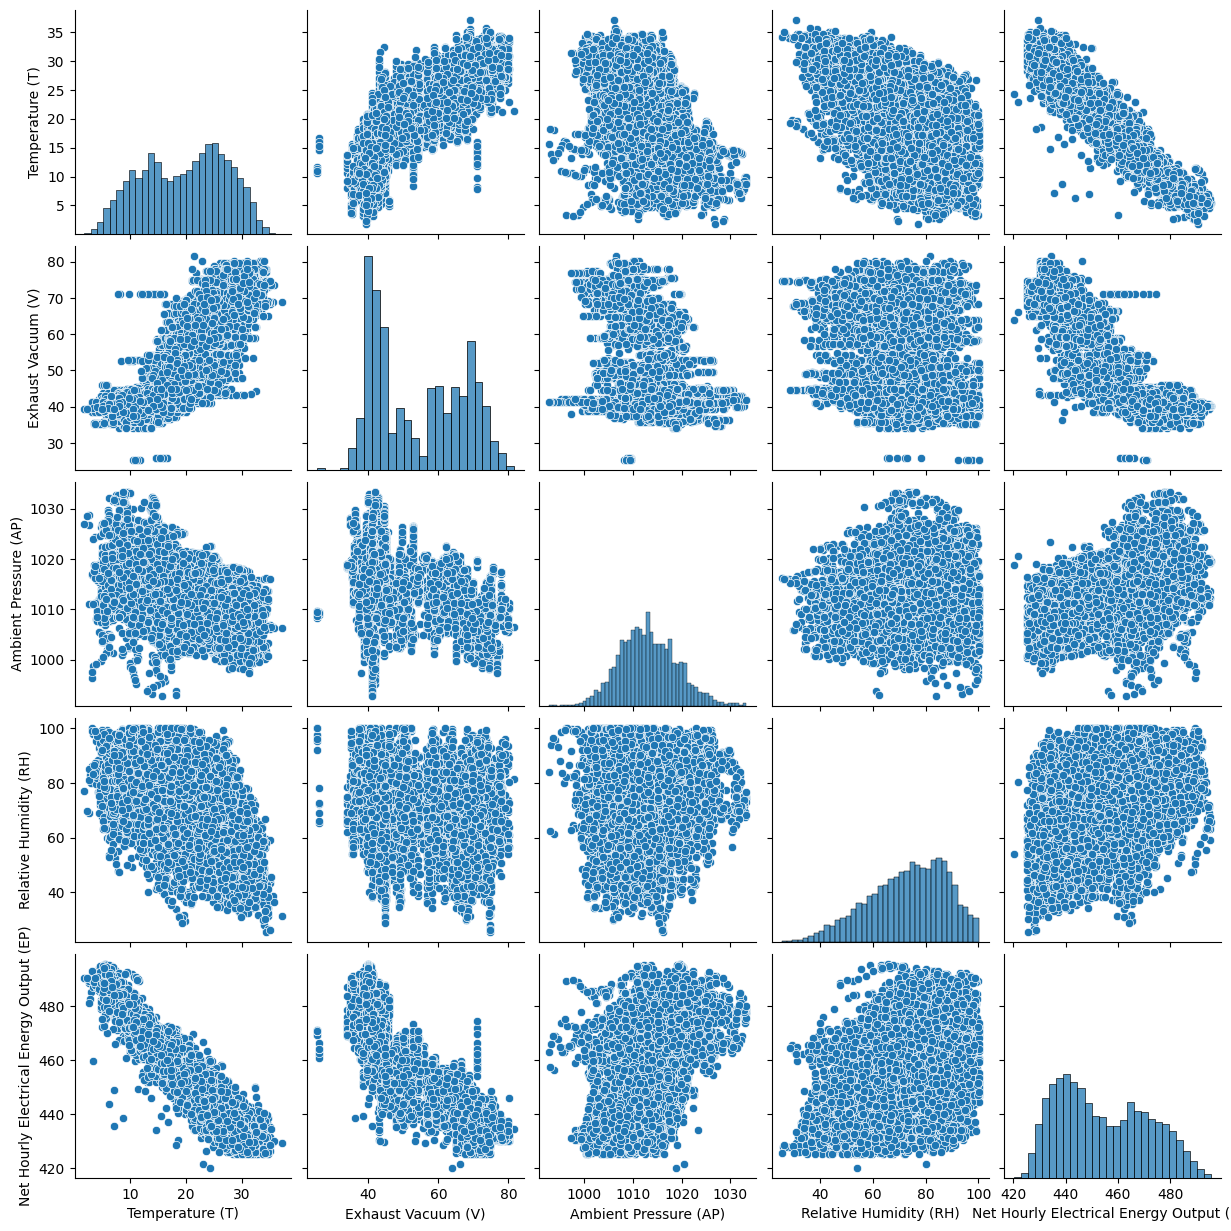

In [2]:
sns.pairplot(df)
plt.show()

#### iii. Descriptive Statistics:

Calculated mean, median, range, quartiles, and interquartile ranges for each variable. These results are summarized in a table.

In [3]:
summary_stats = df.describe()
range_df = df.max() - df.min()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
medians = df.median()
summary_stats.loc['range_df'] = range_df
summary_stats.loc['IQR'] = IQR
summary_stats.loc['median'] = medians
summary_stats

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Net Hourly Electrical Energy Output (EP)
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
range_df,35.300000,56.200000,40.410000,74.600000,75.500000
IQR,12.210000,24.800000,8.160000,21.502500,28.680000


### (c) Simple Linear Regression

For each predictor, I employed a simple linear regression model to predict the response. Notable findings and statistically significant associations were detailed. Relevant plots were generated, and consideration was given to potential outlier removal.

Regression Model for Temperature (T):
                                       OLS Regression Results                                       
Dep. Variable:     Net Hourly Electrical Energy Output (EP)   R-squared:                       0.899
Model:                                                  OLS   Adj. R-squared:                  0.899
Method:                                       Least Squares   F-statistic:                 8.510e+04
Date:                                      Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                                              15:13:29   Log-Likelihood:                -29756.
No. Observations:                                      9568   AIC:                         5.952e+04
Df Residuals:                                          9566   BIC:                         5.953e+04
Df Model:                                                 1                                         
Covariance Type:                                  non

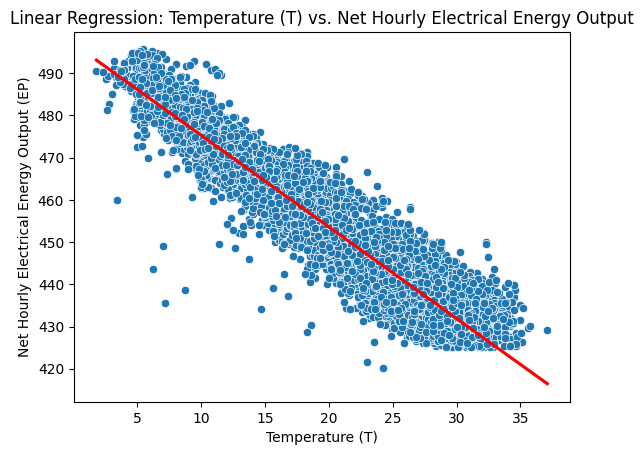

Regression Model for Exhaust Vacuum (V):
                                       OLS Regression Results                                       
Dep. Variable:     Net Hourly Electrical Energy Output (EP)   R-squared:                       0.757
Model:                                                  OLS   Adj. R-squared:                  0.756
Method:                                       Least Squares   F-statistic:                 2.972e+04
Date:                                      Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                                              15:13:31   Log-Likelihood:                -33963.
No. Observations:                                      9568   AIC:                         6.793e+04
Df Residuals:                                          9566   BIC:                         6.794e+04
Df Model:                                                 1                                         
Covariance Type:                                  

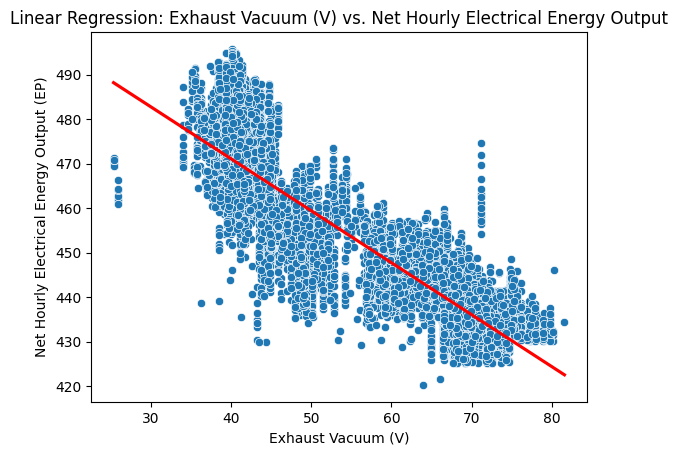

Regression Model for Ambient Pressure (AP):
                                       OLS Regression Results                                       
Dep. Variable:     Net Hourly Electrical Energy Output (EP)   R-squared:                       0.269
Model:                                                  OLS   Adj. R-squared:                  0.269
Method:                                       Least Squares   F-statistic:                     3516.
Date:                                      Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                                              15:13:32   Log-Likelihood:                -39224.
No. Observations:                                      9568   AIC:                         7.845e+04
Df Residuals:                                          9566   BIC:                         7.847e+04
Df Model:                                                 1                                         
Covariance Type:                               

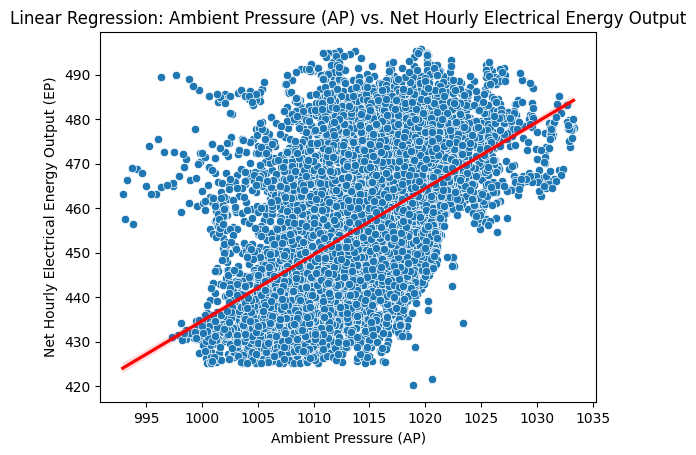

Regression Model for Relative Humidity (RH):
                                       OLS Regression Results                                       
Dep. Variable:     Net Hourly Electrical Energy Output (EP)   R-squared:                       0.152
Model:                                                  OLS   Adj. R-squared:                  0.152
Method:                                       Least Squares   F-statistic:                     1714.
Date:                                      Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                                              15:13:34   Log-Likelihood:                -39933.
No. Observations:                                      9568   AIC:                         7.987e+04
Df Residuals:                                          9566   BIC:                         7.988e+04
Df Model:                                                 1                                         
Covariance Type:                              

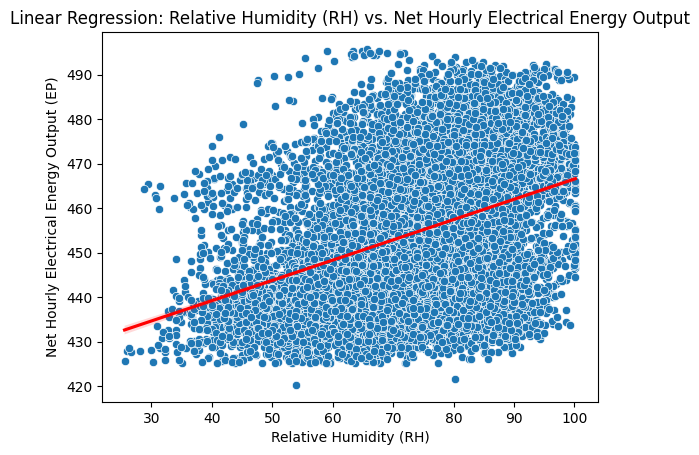

In [4]:
response_variable = 'Net Hourly Electrical Energy Output (EP)'
predictors = ['Temperature (T)', 'Exhaust Vacuum (V)','Ambient Pressure (AP)', 'Relative Humidity (RH)']
for predictor in predictors:
    X = sm.add_constant(df[predictor])
    y = df["Net Hourly Electrical Energy Output (EP)"]
    model = sm.OLS(y, X).fit()
    print(f"Regression Model for {predictor}:")
    print(model.summary())
    sns.scatterplot(x=predictor, y="Net Hourly Electrical Energy Output (EP)", data=df)
    sns.regplot(x=predictor, y="Net Hourly Electrical Energy Output (EP)", data=df, scatter=False, color='r')
    plt.title(f"Linear Regression: {predictor} vs. Net Hourly Electrical Energy Output")
    plt.xlabel(predictor)
    plt.ylabel("Net Hourly Electrical Energy Output (EP)")
    plt.show()

In [5]:
threshold = 3
df_cleaned = df.copy()
for predictor in predictors:
    z_scores = np.abs(stats.zscore(df[predictor]))
    outlier_indices = np.where(z_scores > threshold)
    print(f"Indices of outliers for {predictor}: {outlier_indices}")
    df_cleaned = df_cleaned.drop(outlier_indices[0])
print("Cleaned dataset:")
print(df_cleaned)

Indices of outliers for Temperature (T): (array([], dtype=int64),)
Indices of outliers for Exhaust Vacuum (V): (array([], dtype=int64),)
Indices of outliers for Ambient Pressure (AP): (array([ 319,  536,  669,  715,  753,  810,  847, 1091, 1250, 1660, 2298,
       2481, 2579, 2761, 3015, 3021, 3213, 3412, 3483, 3796, 3955, 4067,
       4125, 4327, 5431, 5529, 5690, 5805, 5840, 5863, 5928, 5956, 6006,
       6346, 6789, 7077, 7186, 7320, 7485, 7807, 7892, 8098, 8104, 8133,
       8270, 8462, 8568, 9068, 9159, 9267, 9342]),)
Indices of outliers for Relative Humidity (RH): (array([ 789, 2262, 3603, 4367, 8061, 8751, 9015]),)
Cleaned dataset:
      Temperature (T)  Exhaust Vacuum (V)  Ambient Pressure (AP)  \
0               14.96               41.76                1024.07   
1               25.18               62.96                1020.04   
2                5.11               39.40                1012.16   
3               20.86               57.32                1010.24   
4            

From the results of the linear regression models I got p-values=0 for all predictors, which means they have a significant impact on the response variable(PE). For the outliers, I set the 3 deviations to be threshold. 

### (d) Multiple Regression

A multiple regression model was fitted using all predictors to predict the response. A discussion ensued on predictors where the null hypothesis H₀: βⱼ = 0 can be rejected.

In [6]:
intercept = sm.add_constant(df[predictors])
model = sm.OLS(df[response_variable], intercept).fit()
print(model.summary())

                                       OLS Regression Results                                       
Dep. Variable:     Net Hourly Electrical Energy Output (EP)   R-squared:                       0.929
Model:                                                  OLS   Adj. R-squared:                  0.929
Method:                                       Least Squares   F-statistic:                 3.114e+04
Date:                                      Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                                              15:13:35   Log-Likelihood:                -28088.
No. Observations:                                      9568   AIC:                         5.619e+04
Df Residuals:                                          9563   BIC:                         5.622e+04
Df Model:                                                 4                                         
Covariance Type:                                  nonrobust                                

Since the p-values are all 0(<0.05), so we reject the null hypothesis for all of the predictors.

### (e) c Compare to d

A graphical representation was created, comparing univariate regression coefficients from simple linear regression (c) with those from multiple linear regression (d).

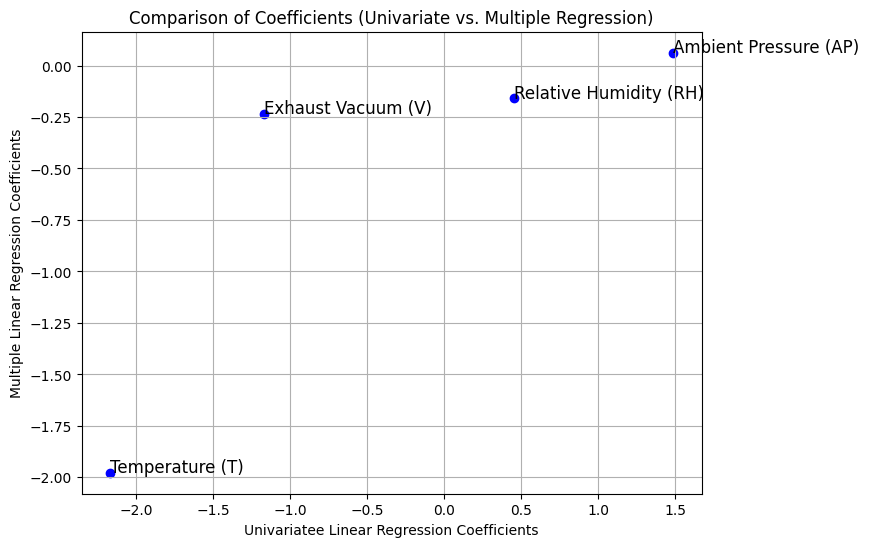

In [7]:
univariate_regression_coeffs = []
multiple_regression_coeffs = []
for predictor in predictors:
    x_univariate = sm.add_constant(df[predictor])
    model_univariate = sm.OLS(df[response_variable], x_univariate).fit()
    univariate_regression_coeffs.append(model_univariate.params[predictor])
    x_multiple = sm.add_constant(df[predictors])
    model_multiple = sm.OLS(df[response_variable], x_multiple).fit()
    multiple_regression_coeffs.append(model_multiple.params[predictor])
plt.figure(figsize=(8, 6))
plt.scatter(univariate_regression_coeffs, multiple_regression_coeffs, marker='o', color='blue')
plt.xlabel('Univariatee Linear Regression Coefficients')
plt.ylabel('Multiple Linear Regression Coefficients')
plt.title('Comparison of Coefficients (Univariate vs. Multiple Regression)')
plt.grid(True)
for i, predictor in enumerate(predictors):
    plt.annotate(predictor, (univariate_regression_coeffs[i], multiple_regression_coeffs[i]), fontsize=12)
plt.show()

### (f) Nonlinear Association

Investigated potential nonlinear associations by fitting models of the form Y = β₀ + β₁X + β₂X² + β₃X³ for each predictor X.

In [8]:
degree=3
for predictor in predictors:
    X = df[predictor]
    y = df[response_variable]
    X_1 = pd.DataFrame()
    X_1["X"] = X
    for degree in range(2, degree + 1):
        X_1[f"X^{degree}"] = X ** degree
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1).fit()
    print(f"Polynomial Regression for {predictor}:")
    print(model.summary())

Polynomial Regression for Temperature (T):
                                       OLS Regression Results                                       
Dep. Variable:     Net Hourly Electrical Energy Output (EP)   R-squared:                       0.912
Model:                                                  OLS   Adj. R-squared:                  0.912
Method:                                       Least Squares   F-statistic:                 3.299e+04
Date:                                      Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                                              15:13:35   Log-Likelihood:                -29101.
No. Observations:                                      9568   AIC:                         5.821e+04
Df Residuals:                                          9564   BIC:                         5.824e+04
Df Model:                                                 3                                         
Covariance Type:                                

From the results, we can see that p-values are all 0, this indicate that there is a nonlinear association between the predictors and the response.

### (g) Interactions Terms

Explored the association of interaction terms between predictors and the response using a full linear regression model, highlighting statistically significant interactions.


In [9]:
df.rename(columns={
    'Net Hourly Electrical Energy Output (EP)': 'EP',
    'Temperature (T)': 'T',
    'Exhaust Vacuum (V)': 'V',
    'Ambient Pressure (AP)': 'AP',
    'Relative Humidity (RH)': 'RH'
}, inplace=True)
model_formula = "EP ~ T + V + AP + RH + T:V + T:AP + T:RH + V:AP + V:RH + AP:RH"
model = smf.ols(formula=model_formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:13:35   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

The p-value of T:V is 0, this indicate that the interaction between Temperature and Ambient Pressure is statistically significant and associated with EP. Same for T:RH and V:AP. The p-value of AP:RH is 0.034(<0.05), this indicate that the interaction between them is statistically significant and has an association with EP. The p_value of V:AP is 0.086(>0.05), this indicate that the interaction between them may be significant. The p-value of T:AP is 0.452(>0.05), this indicate that the interaction between them is not statistically significant and may not have a strong association with EP.

### (h) Model Enhancement:

Attempted to enhance the model by introducing interaction terms and nonlinear associations. Trained the model on a randomly selected 70% subset of the data, testing on the remaining data points. Reported Mean Squared Errors (MSEs) for both training and testing phases.

In [10]:
predictors = ["T", "V", "AP", "RH"]
response_variable = "EP"
for predictor in predictors:
    df[predictor + "_squared"] = df[predictor] ** 2
for i in range(len(predictors)):
    for j in range(i + 1, len(predictors)):
        df[predictors[i] + "_" + predictors[j]] = df[predictors[i]] * df[predictors[j]]
X = df.drop(response_variable, axis=1)
y = df[response_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model1 = LinearRegression()
model1.fit(X_train, y_train)
model2_predictors = predictors
model2 = LinearRegression()
model2.fit(X_train[model2_predictors], y_train)
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)
mse_train1 = mean_squared_error(y_train, y_train_pred1)
mse_test1 = mean_squared_error(y_test, y_test_pred1)
y_train_pred2 = model2.predict(X_train[model2_predictors])
y_test_pred2 = model2.predict(X_test[model2_predictors])
mse_train2 = mean_squared_error(y_train, y_train_pred2)
mse_test2 = mean_squared_error(y_test, y_test_pred2)
print("Model 1 (Linear Model with all predictors):")
print(f"Train MSE: {mse_train1:.2f}")
print(f"Test MSE: {mse_test1:.2f}")
print("\nModel 2 (Linear Model with interactions and quadratic terms, feature selection):")
print(f"Train MSE: {mse_train2:.2f}")
print(f"Test MSE: {mse_test2:.2f}")

Model 1 (Linear Model with all predictors):
Train MSE: 17.89
Test MSE: 18.65

Model 2 (Linear Model with interactions and quadratic terms, feature selection):
Train MSE: 20.58
Test MSE: 21.24


### (i) KNN

Utilized k-nearest neighbor regression on both normalized and raw features, exploring values of k ∈ {1, 2, ..., 100}. Plotted train and test errors in terms of 1/k.

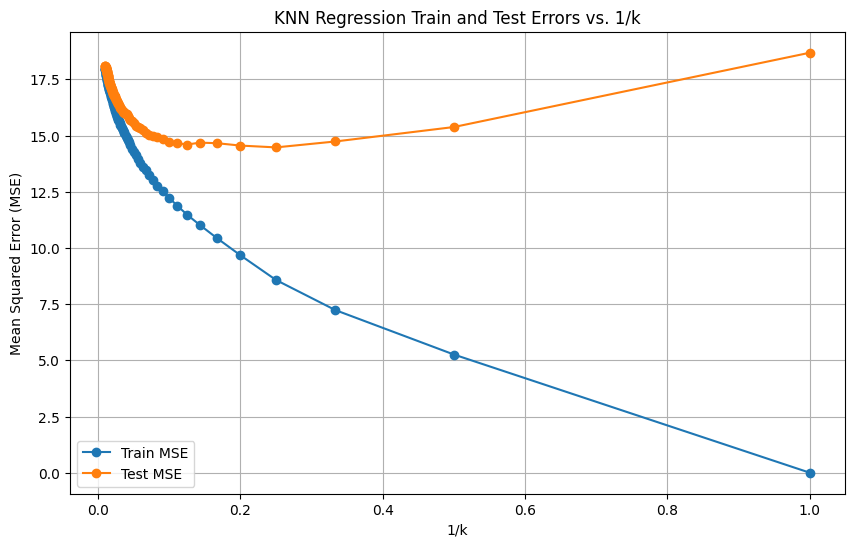

The best value of k is 4 with a test MSE of 14.47


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
k_values = range(1, 101)
train_errors = []
test_errors = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_norm, y_train)
    y_train_pred = knn.predict(X_train_norm)
    y_test_pred = knn.predict(X_test_norm)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_mse)
    test_errors.append(test_mse)
k = [1 / k for k in k_values]
plt.figure(figsize=(10, 6))
plt.plot(k, train_errors, label='Train MSE', marker='o')
plt.plot(k, test_errors, label='Test MSE', marker='o')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('KNN Regression Train and Test Errors vs. 1/k')
plt.legend()
plt.grid(True)
plt.show()
best_k = k_values[np.argmin(test_errors)]
print(f"The best value of k is {best_k} with a test MSE of {min(test_errors):.2f}")

### (j ) Compare KNN and Linear

Compared the results of KNN Regression with the linear regression model displaying the smallest test error, providing insights and analysis.

In [21]:
R_knn = r2_score(y_test, y_test_pred)
R_knn

0.938280125755495

R-squared (R2) Comparison:
KNN R2: 0.938
Linear R2: 0.936
Conclusion: KNN explains a slightly larger proportion of the variance in the data.
MSE Comparison:
Linear Model MSE (Test): 18.65
KNN Model MSE (Test): 14.47
Conclusion: KNN provides a lower test MSE, indicating better predictive accuracy.

By comparing both the R-squared (R2) value and the Mean Squared Error (MSE) metrics, it's evident that the K-nearest neighbor (KNN) regression model outperforms the linear regression model in explaining and predicting the dataset.